#**🐍 Python EDA process** #

## 1️⃣ Upload & Load Dataset ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading the CSV file
df= pd.read_csv("/user_events_ecommerce_product_analytics.csv")
df

,user_id,session_id,event_date,event_time,event_type,product_id,category,price,device,traffic_source,country,city
0,U110476,S2867825,2024-01-13,09:23:00,view,P3286,Men Pants,NaN,Mobile,Referral,USA,San Francisco
1,U100520,S1499914,2024-02-17,07:27:00,purchase,P4257,Casual Wear,2502.94,Web,Email,USA,New York
2,U100106,S3678638,2024-12-23,14:25:00,add_to_cart,P3547,Women Pants,4815.02,Web,Organic,UK,Manchester
3,U101519,S7374122,2024-02-19,12:15:00,view,P1711,Formal Wear,NaN,Mobile,Referral,UK,Manchester
4,U101291,S5918715,2024-11-17,21:06:00,visit,P2139,Men Pants,NaN,Mobile,Email,UK,London
...,...,...,...,...,...,...,...,...,...,...,...,...
319995,U105996,S2670801,2024-05-11,20:37:00,add_to_cart,P6776,Women Pants,2013.84,Mobile,Referral,India,Pune
319996,U107396,S1328486,2024-09-30,11:34:00,view,P2487,Women Pants,NaN,Web,Organic,UK,Manchester
319997,U106693,S5511780,2024-04-23,21:31:00,checkout,P5460,Women Pants,1831.54,Mobile,Email,UK,Manchester
319998,U100429,S7112302,2024-01-18,21:54:00,view,P9043,Formal Wear,NaN,Mobile,Email,USA,Chicago


## 2️⃣ Basic Dataset Understanding ##

In [3]:
df.head()

,user_id,session_id,event_date,event_time,event_type,product_id,category,price,device,traffic_source,country,city
0,U110476,S2867825,2024-01-13,09:23:00,view,P3286,Men Pants,NaN,Mobile,Referral,USA,San Francisco
1,U100520,S1499914,2024-02-17,07:27:00,purchase,P4257,Casual Wear,2502.94,Web,Email,USA,New York
2,U100106,S3678638,2024-12-23,14:25:00,add_to_cart,P3547,Women Pants,4815.02,Web,Organic,UK,Manchester
3,U101519,S7374122,2024-02-19,12:15:00,view,P1711,Formal Wear,NaN,Mobile,Referral,UK,Manchester
4,U101291,S5918715,2024-11-17,21:06:00,visit,P2139,Men Pants,NaN,Mobile,Email,UK,London


In [4]:
df.shape

(320000, 12)

In [5]:
df.columns

Index(['user_id', 'session_id', 'event_date', 'event_time', 'event_type',
       'product_id', 'category', 'price', 'device', 'traffic_source',
       'country', 'city'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320000 entries, 0 to 319999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         320000 non-null  object 
 1   session_id      320000 non-null  object 
 2   event_date      320000 non-null  object 
 3   event_time      320000 non-null  object 
 4   event_type      320000 non-null  object 
 5   product_id      320000 non-null  object 
 6   category        320000 non-null  object 
 7   price           121820 non-null  float64
 8   device          320000 non-null  object 
 9   traffic_source  320000 non-null  object 
 10  country         320000 non-null  object 
 11  city            320000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 29.3+ MB


## 3️⃣ Summary Statistics ##

In [7]:
df.describe()

,price
count,121820.000000
mean,2846.568631
std,1242.942647
min,699.020000
25%,1768.262500
50%,2844.665000
75%,3925.790000
max,4998.990000


## 4️⃣ Missing Values Analysis ##

In [9]:
df.isnull().sum()

,0
user_id,0
session_id,0
event_date,0
event_time,0
event_type,0
product_id,0
category,0
price,198180
device,0
traffic_source,0


In [10]:
(df.isnull().mean()*100).round(2)

,0
user_id,0.00
session_id,0.00
event_date,0.00
event_time,0.00
event_type,0.00
product_id,0.00
category,0.00
price,61.93
device,0.00
traffic_source,0.00


## 5️⃣ Duplicate Records Check ##

In [11]:
df.duplicated().sum()

np.int64(0)

THERE ARE NO DUPLICATE IN THE DATASET SO WE WILL NOT USE df.drop_duplicates() fuction

## 6️⃣ Event Funnel Analysis ##

In [12]:
df["event_type"].value_counts()

,count
event_type,
view,102371
visit,95809
add_to_cart,57809
checkout,38501
purchase,25510


In [14]:
(df["event_type"].value_counts(normalize=True)*100).round(2)

,proportion
event_type,
view,31.99
visit,29.94
add_to_cart,18.07
checkout,12.03
purchase,7.97


## 7️⃣ User-Level Analysis ##

In [16]:
# Unique users
df["user_id"].nunique()

12000

In [17]:
df.groupby("user_id").size().describe()

,0
count,12000.000000
mean,26.666667
std,5.217454
min,10.000000
25%,23.000000
50%,27.000000
75%,30.000000
max,50.000000


## 8️⃣ Time-Based Analysis ##

In [19]:
# Convert timestamp
df['event_time'] = pd.to_datetime(df['event_time'])


In [20]:
# Extract time features
df['date'] = df['event_time'].dt.date
df['month'] = df['event_time'].dt.to_period('M')
df['hour'] = df['event_time'].dt.hour


In [21]:
df.groupby("date").size().head()

,0
date,
2025-12-28,320000


## 9️⃣ Price Analysis ##

In [22]:
df["price"].describe()

,price
count,121820.000000
mean,2846.568631
std,1242.942647
min,699.020000
25%,1768.262500
50%,2844.665000
75%,3925.790000
max,4998.990000


In [23]:
df[df["event_type"] == "purchase"]["price"].describe()

,price
count,25510.000000
mean,2843.782132
std,1249.714765
min,699.020000
25%,1749.392500
50%,2839.770000
75%,3936.810000
max,4998.280000


## 🔟 Brand & Category Analysis ##

In [26]:
df["category"].value_counts().head(10)

,count
category,
Casual Wear,64070
Women Pants,64059
Jeans,64037
Men Pants,63978
Formal Wear,63856


## 1️⃣1️⃣ Simple Visual EDA (Optional but Good) ##

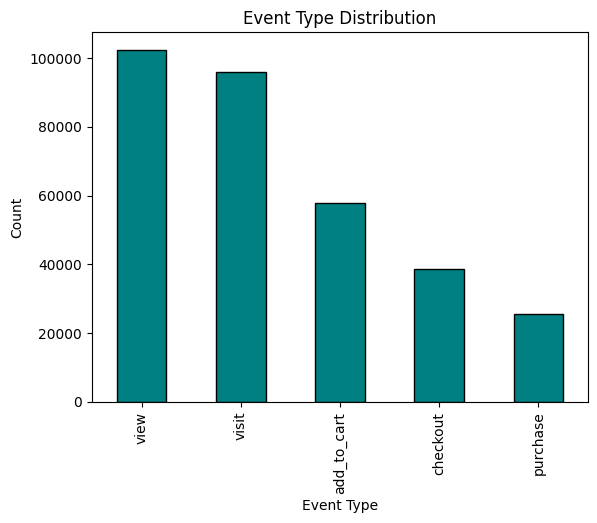

In [29]:
df["event_type"].value_counts().plot(kind="bar",color= "teal",edgecolor="black")
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

## EXPORTING CLEAN DATASET ##

In [30]:
export_path = "user_events_cleaned.csv"
df.to_csv(export_path, index=False)
